#**Author : Suleman Sayyed** <br>    
###**Intern @ GRIP Spark Foundation** <br>

###**Data Science Bussiness Analyst**

$\color{red}{\text{Task No.2 - From the given "Iris" Dataset, predict the optimum number of clusters & represent it visually.  }}$ <br>


*   <a href="#linearity">We would be doing **prediction using unsupervised ML** 


####**Table of Content**

<a href="#linearity">$\color{green}{\text{1. Importing libraries}}$ <br>
<a href="#linearity">$\color{green}{\text{2. Reading the data from file/source }}$<br>
<a href="#linearity">$\color{green}{\text{3. Input data Visualization}}$ <br>
<a href="#linearity">$\color{green}{\text{3.1. Data Preprocessing}}$ <br>
<a href="#linearity">$\color{green}{\text{4. Finding the optimum number of clusters}}$ <br>
<a href="#linearity">$\color{green}{\text{5. Model Training}}$ <br>
<a href="#linearity">$\color{green}{\text{6. Visualising the clusters & Plotting the centroids of the clusters}}$ <br>
<a href="#linearity">$\color{green}{\text{7. Conclusion}}$ <br>


####**Language =** Python
####**IDE =** Google Colab

##**Step No.1 - Loading/Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##**Step No.2 - Reading the dataset**

In [2]:
df=pd.read_csv("/content/Iris (1).csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##**Step No.3 - input data visualization**

Plotting the pairwise plot of multiple features(variables) in a grid format

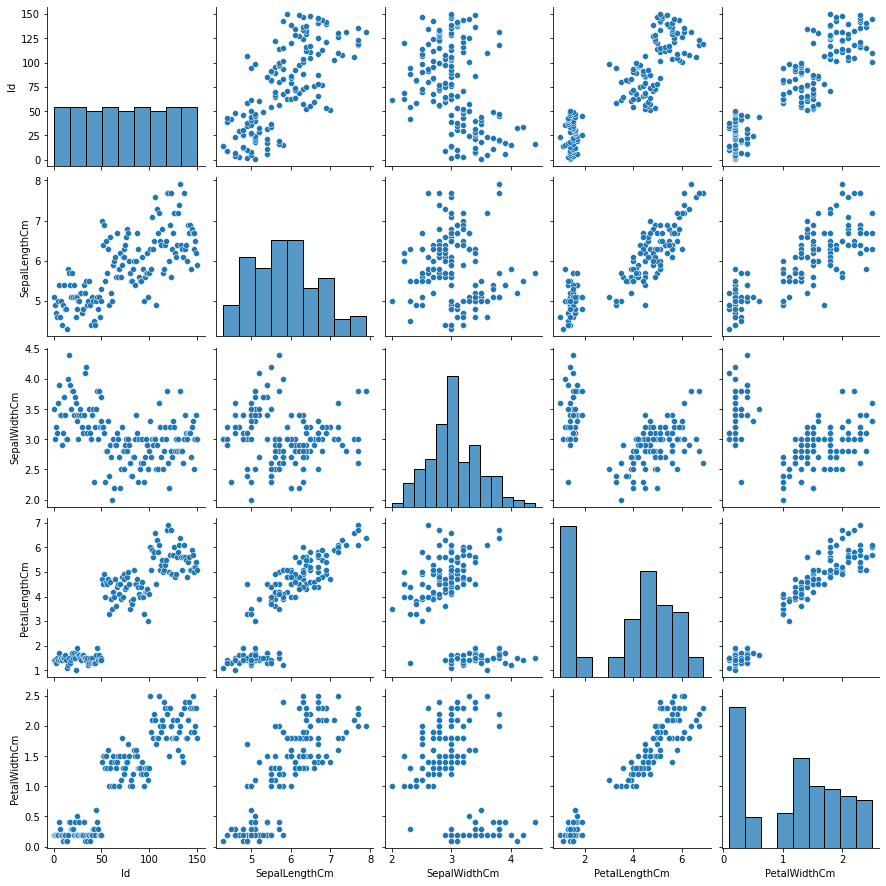

In [7]:
sns.pairplot(data=df)

##**Step NO. 3.1 - data pre-proccessing and visualization**

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

Text(0, 0.5, 'SepalWidthCm')

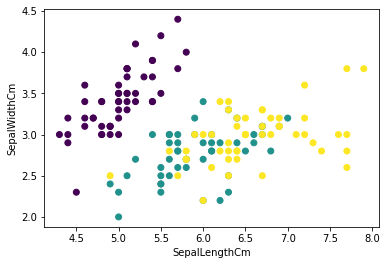

In [9]:
plt.scatter(df["SepalLengthCm"],df["SepalWidthCm"],c=df["Species"])  #here 'c' value should me sequence of color or sequence of No. 
plt.xlabel("SepalLengthCm",fontsize=10)                             #so we here already encoded species in number form.
plt.ylabel("SepalWidthCm",fontsize=10)                             

Text(0, 0.5, 'PetalWidthCm')

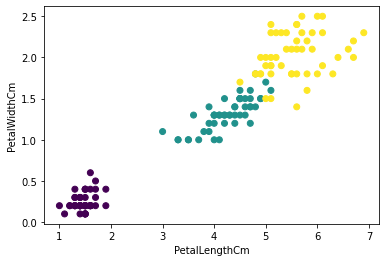

In [10]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df["Species"])
plt.xlabel("PetalLengthCm",fontsize=10)
plt.ylabel("PetalWidthCm",fontsize=10)

before we procced further we need to clear some data from our dataset that we don't need rightnow for clustering. So dropping some columns is must.

In [12]:
df1=df.drop(['Id','Species'],axis=1)

In [13]:
df1.shape

(150, 4)

In [14]:
X=df1

##**Step No.4 - Finding the optimum number of clusters**
Here we are taking number of clusters ranging from 1 to 10

In [15]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
  model=KMeans(n_clusters=i)
  model.fit(X)
  ssd.append(model.inertia_)

Plotting line graph to observe the elbow

Text(0, 0.5, 'inertia')

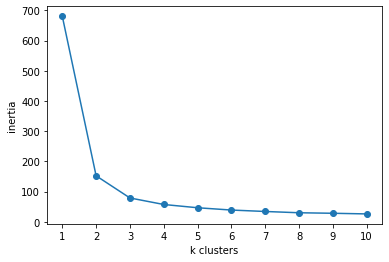

In [16]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("k clusters")
plt.ylabel("inertia")
#plt.legend()

##**Step No.5 - Model Training**

Applying kmeans for k=3

In [17]:
model=KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [19]:
model.n_iter_

4

**Displaying cluster centers**

In [20]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [21]:
centroid=model.cluster_centers_
#checking centroid values
for i in range(centroid.shape[0]):
  print(centroid[i])
centroid.shape

[5.9016129  2.7483871  4.39354839 1.43387097]
[5.006 3.418 1.464 0.244]
[6.85       3.07368421 5.74210526 2.07105263]


(3, 4)

##**Step No.6 - Visualising the clusters & Plotting the centroids of the clusters**

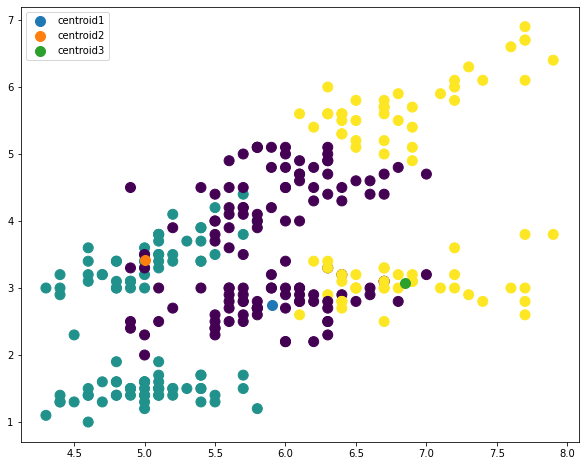

In [28]:
fig=plt.figure(figsize=(10,8))
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],s = 100,c=model.labels_) 
plt.scatter(df['SepalLengthCm'],df['PetalLengthCm'],s = 100,c=model.labels_)
#plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=model.labels_)
for i in range(centroid.shape[0]):
  plt.scatter(centroid[i][0],centroid[i][1],s = 100,label="centroid"+str(i+1))

plt.legend()

##**Conclusion:**
 $\color{red}{\text{Predicted the number of clusters are equal to the number of clusters found by visualizing the same data, that is 3.}}$
